In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
def sectorDynamics(vx, t, B, M, P, alpha):

    x, y = vx

    #payoffMatrix
    pm = [[B-M+ alpha, B-P-alpha, -M, 0],
         [0, -P, 0, 0]]
    
     #fitness difference in the 3 sectors
    airportsDiff  = y*(pm[0][0]-pm[1][0])+(1-y)*(pm[0][2]-pm[1][2])
    airlinesDiff = x*(pm[0][1]-pm[0][3])+(1-x)*(pm[1][1]-pm[1][3])
    
    #replicator dynamics
    x1 = x*(1-x)*((airportsDiff))
    x2 = y*(1-y)*((airlinesDiff))

    dxdt = [x1, x2]

    return dxdt

In [16]:
# initial conditions: 10% of each sector adopts 
x0 = [0.858, 0.5]

t1 = np.linspace(0, 500, 100)
sol1 = odeint(sectorDynamics, x0, t1, args=(1.49, 0.18, 0.12, 0.11))

t2 = np.linspace(0, 500, 100)
sol2 = odeint(sectorDynamics, x0, t2, args=(0.25, 0.18, 0.12, 0.11))

t3 = np.linspace(0, 500, 100)
sol3 = odeint(sectorDynamics, x0, t3, args=(0.25, 0.10, 0.13, 0.11))





Text(0.5, 1.0, 'Evolution of H2 strategy')

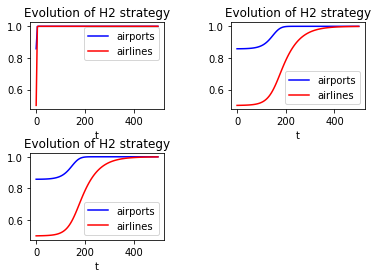

In [17]:
#plot
plt.subplot(221)
plt.plot(t1, sol1[:, 0], 'b', label='airports')
plt.plot(t1, sol1[:, 1], 'r', label='airlines')
plt.xlabel('t')
plt.legend(loc='best')
plt.title('Evolution of H2 strategy (large benefit)')
plt.subplots_adjust(wspace=0.5, hspace=0.5)


plt.subplot(222)
plt.plot(t2, sol2[:, 0], 'b', label='airports')
plt.plot(t2, sol2[:, 1], 'r', label='airlines')
plt.xlabel('t')
plt.legend(loc='best')
plt.title('Evolution of H2 strategy (small benefit, M>P)')

plt.subplot(223)
plt.plot(t2, sol2[:, 0], 'b', label='airports')
plt.plot(t2, sol2[:, 1], 'r', label='airlines')
plt.xlabel('t')
plt.legend(loc='best')
plt.title('Evolution of H2 strategy (small benefit, P>M)')
